In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import cv2
import os

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d shayanfazeli/heartbeat

 97% 96.0M/98.8M [00:00<00:00, 144MB/s]
100% 98.8M/98.8M [00:00<00:00, 156MB/s]


In [5]:
import zipfile
zf = "/content/heartbeat.zip"
target_dir = "/content/dataset/mitbih-database"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [6]:
train = pd.read_csv('/content/dataset/mitbih-database/mitbih_train.csv',header=None).astype(np.float32)
test = pd.read_csv('/content/dataset/mitbih-database/mitbih_test.csv',header=None).astype(np.float32)

In [7]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

In [8]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890356,0.758160,0.423974,0.219104,0.201128,0.210400,0.205808,0.201773,0.198692,0.196757,0.198779,0.203551,0.208776,0.212885,0.218393,0.224967,0.231379,0.237125,0.242582,0.247923,0.253751,0.259748,0.266245,0.272733,0.279354,0.285588,0.291808,0.297672,0.303384,0.308793,0.313893,0.318457,0.322086,0.324891,0.326734,0.327816,0.327930,0.326746,0.324325,0.320536,...,0.030729,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023932,0.023060,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240888,0.221814,0.227304,0.206878,0.177056,0.171909,0.178480,0.177242,0.171778,0.168357,0.171796,0.176496,0.180276,0.184101,0.186961,0.190001,0.193898,0.198464,0.202855,0.207166,0.211186,0.214820,0.218448,0.221486,0.224031,0.225848,0.227133,0.227828,0.228436,0.228871,0.228760,0.228392,0.227472,0.226179,0.224658,0.223108,0.221350,0.219258,0.216883,0.214167,...,0.116490,0.114428,0.112680,0.111051,0.110542,0.108570,0.106472,0.104562,0.102671,0.101389,0.100239,0.099363,0.098335,0.096661,0.095734,0.095383,0.095070,0.092874,0.091131,0.088560,0.084640,0.079984,0.075278,0.069872,0.063992,0.060067,0.056399,0.052856,0.050005,0.046697,0.044163,0.042087,0.040523,0.038648,0.037200,0.036258,0.034781,0.032867,0.031921,1.143108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,0.070543,0.069182,0.068293,0.067744,0.070175,0.072993,0.074803,0.075972,0.076923,0.077872,0.079442,0.081911,0.085938,0.090032,0.094595,0.098901,0.103960,0.109348,0.114754,0.120730,0.127946,0.135962,0.144295,0.151852,0.157895,0.161035,0.161133,0.159383,0.157343,0.155388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Count in each label: 
0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


<BarContainer object of 5 artists>

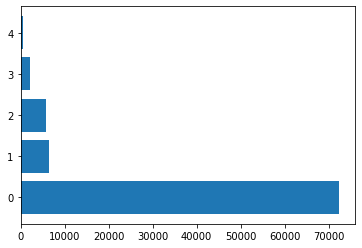

In [9]:
# The classes

label_names = ['Non-ecotic beats (normal beat)', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'Unknown beats']

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

plt.barh(list(set(labels)), list(labels.value_counts()))

Count in each label: 
0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


<BarContainer object of 5 artists>

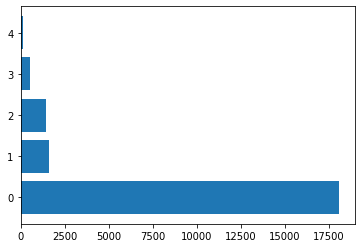

In [10]:
# The classes

label_names = ['Non-ecotic beats (normal beat)', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'Unknown beats']

labels = test[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

plt.barh(list(set(labels)), list(labels.value_counts()))

In [11]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.641256,0.662182,0.678625,0.684604,0.695067,0.699552,0.710015,0.704036,0.726457,0.7354

In [14]:
# Separating the test dataframe into 5 individual ones based on class labels, and sampling 5000 from each.

test_lbl0 = resample(test[test[187]==0], replace=True, n_samples=5000, random_state=113)
test_lbl1 = resample(test[test[187]==1], replace=True, n_samples=5000, random_state=113)
test_lbl2 = resample(test[test[187]==2], replace=True, n_samples=5000, random_state=113)
test_lbl3 = resample(test[test[187]==3], replace=True, n_samples=5000, random_state=113)
test_lbl4 = resample(test[test[187]==4], replace=True, n_samples=5000, random_state=113)

In [15]:
# Concatenate the 5 dataframes into 1

test = pd.concat([test_lbl0, test_lbl1, test_lbl2, test_lbl3, test_lbl4]).astype(np.float32)

labels = test[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 187, dtype: int64


In [16]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
14501,0.996532,0.842775,0.398844,0.000000,0.187283,0.233526,0.171098,0.163006,0.174566,0.178035,0.174566,0.179191,0.182659,0.189595,0.191908,0.193064,0.202312,0.218497,0.216185,0.225434,0.239306,0.254335,0.263584,0.278613,0.301734,0.323699,0.331792,0.349133,0.359538,0.365318,0.354913,0.339884,0.320231,0.290173,0.253179,0.221965,0.206936,0.201156,0.183815,0.180347,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4828,0.961165,0.936893,0.762136,0.524272,0.310680,0.169903,0.087379,0.101942,0.135922,0.116505,0.097087,0.135922,0.155340,0.150485,0.135922,0.165049,0.179612,0.145631,0.169903,0.184466,0.189320,0.189320,0.189320,0.223301,0.228155,0.208738,0.213592,0.237864,0.262136,0.237864,0.242718,0.257282,0.286408,0.262136,0.262136,0.252427,0.252427,0.233010,0.208738,0.194175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16236,0.000000,0.074286,0.154286,0.354286,0.480000,0.582857,0.702857,0.680000,0.708571,0.725714,0.742857,0.742857,0.731429,0.720000,0.737143,0.760000,0.737143,0.765714,0.742857,0.754286,0.782857,0.782857,0.811429,0.817143,0.817143,0.834286,0.857143,0.851429,0.885714,0.862857,0.902857,0.914286,0.925714,0.897143,0.897143,0.925714,0.885714,0.868571,0.868571,0.811429,...,0.782857,0.788571,0.805714,0.811429,0.805714,0.805714,0.845714,0.834286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11010,1.000000,0.967871,0.570281,0.273092,0.246988,0.216867,0.204819,0.158635,0.160643,0.112450,0.092369,0.072289,0.078313,0.066265,0.070281,0.058233,0.070281,0.048193,0.068273,0.054217,0.054217,0.040161,0.046185,0.028112,0.026104,0.020080,0.030120,0.014056,0.024096,0.000000,0.012048,0.024096,0.036145,0.050201,0.088353,0.098394,0.130522,0.114458,0.146586,0.146586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.899142,0.864807,0.371245,0.004292,0.006438,0.057940,0.060086,0.066524,0.064378,0.057940,0.049356,0.057940,0.051502,0.038627,0.038627,0.042918,0.032189,0.034335,0.023605,0.027897,0.023605,0.008584,0.000000,0.002146,0.008584,0.012876,0.015021,0.032189,0.047210,0.053648,0.072961,0.098712,0.124464,0.130901,0.139485,0.150215,0.150215,0.143777,0.141631,0.139485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20690,0.935006,0.880274,0.802737,0.724059,0.620296,0.510832,0.354618,0.236032,0.139111,0.115165,0.102623,0.060433,0.019384,0.023945,0.104903,0.231471,0.298746,0.343215,0.366021,0.389966,0.429875,0.482326,0.527936,0.586089,0.627138,0.665906,0.677309,0.694413,0.702395,0.729761,0.741163,0.763968,0.781072,0.806157,0.822121,0.849487,0.864310,0.876853,0.873432,0.881414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [17]:
# Separating the train dataframe into 5 individual ones based on class labels, and sampling 20000 from each.

train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=20000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=20000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=20000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=20000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=20000, random_state=113)

In [18]:
# Concatenate the 5 dataframes into 1

train = pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4]).astype(np.float32)

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


In [19]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
30282,0.841743,0.706422,0.363532,0.310780,0.387615,0.355505,0.333716,0.333716,0.329128,0.325688,0.329128,0.329128,0.322248,0.323395,0.326835,0.326835,0.323395,0.323395,0.332569,0.332569,0.327982,0.334862,0.341743,0.347477,0.347477,0.356651,0.369266,0.377294,0.386468,0.397936,0.417431,0.430046,0.434633,0.443807,0.458716,0.462156,0.457569,0.444954,0.435780,0.415138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16236,0.944321,0.683742,0.040089,0.118040,0.131403,0.133630,0.118040,0.126949,0.129176,0.144766,0.265033,0.169265,0.167038,0.193764,0.200445,0.207127,0.191537,0.216036,0.200445,0.204900,0.209354,0.265033,0.287305,0.340757,0.336303,0.365256,0.376392,0.356347,0.314031,0.302895,0.236080,0.189310,0.167038,0.193764,0.129176,0.111359,0.093541,0.104677,0.086860,0.091314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.876122,0.971275,0.558348,0.143627,0.066427,0.025135,0.003591,0.001795,0.039497,0.134650,0.298025,0.396768,0.418312,0.430880,0.439856,0.430880,0.439856,0.441652,0.423698,0.420108,0.411131,0.403950,0.393178,0.378815,0.369838,0.368043,0.351885,0.344704,0.350090,0.348294,0.341113,0.357271,0.378815,0.380610,0.394973,0.412926,0.445242,0.457810,0.459605,0.464991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66327,1.000000,0.757322,0.418410,0.037657,0.016736,0.142259,0.246862,0.251046,0.251046,0.263598,0.276151,0.280335,0.259414,0.267782,0.267782,0.255230,0.251046,0.251046,0.255230,0.242678,0.234310,0.225941,0.230126,0.230126,0.217573,0.196653,0.200837,0.196653,0.188285,0.184100,0.217573,0.217573,0.225941,0.234310,0.271967,0.297071,0.313808,0.368201,0.435146,0.472803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47344,1.000000,0.763699,0.476027,0.363014,0.304795,0.277397,0.263699,0.267123,0.260274,0.260274,0.250000,0.250000,0.243151,0.222603,0.219178,0.212329,0.198630,0.160959,0.154110,0.154110,0.164384,0.147260,0.178082,0.198630,0.195205,0.164384,0.154110,0.130137,0.126712,0.102740,0.123288,0.106164,0.130137,0.130137,0.140411,0.136986,0.140411,0.123288,0.150685,0.136986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83550,0.816479,0.516854,0.554307,0.546816,0.569288,0.535581,0.513109,0.419476,0.303371,0.157303,0.000000,0.022472,0.056180,0.033708,0.067416,0.138577,0.157303,0.146067,0.142322,0.164794,0.176030,0.164794,0.176030,0.149813,0.134831,0.108614,0.101124,0.082397,0.093633,0.063670,0.074906,0.052434,0.074906,0.067416,0.093633,0.104869,0.142322,0.153558,0.194757,0.213483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81987,1.000000,0.990566,0.625786,0.383648,0.169811,0.113208,0.091195,0.110063,0.113208,0.116352,0.106918,0.088050,0.091195,0.094340,0.088050,0.088050,0.075472,0.069182,0.062893,0.059748,0.053459,0.044025,0.034591,0.034

Text(0.5, 1.0, 'Non-ecotic beats (normal beat)')

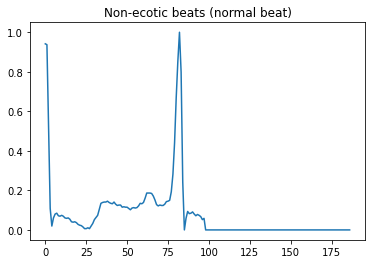

In [20]:
plt.plot(np.array(train_lbl0.sample(1))[0, :187])
plt.title(label_names[0])

Text(0.5, 1.0, 'Supraventricular ectopic beats')

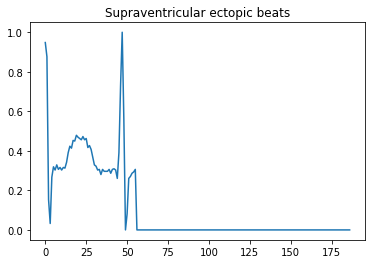

In [21]:
plt.plot(np.array(train_lbl1.sample(1))[0, :187])
plt.title(label_names[1])

Text(0.5, 1.0, 'Ventricular ectopic beats')

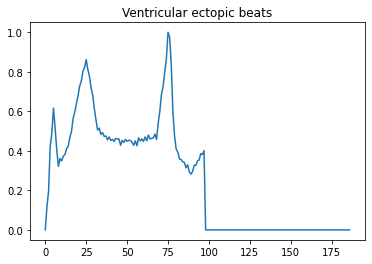

In [22]:
plt.plot(np.array(train_lbl2.sample(1))[0, :187])
plt.title(label_names[2])

Text(0.5, 1.0, 'Fusion beats')

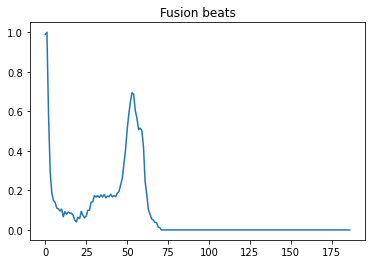

In [23]:
plt.plot(np.array(train_lbl3.sample(1))[0, :187])
plt.title(label_names[3])

Text(0.5, 1.0, 'Unknown beats')

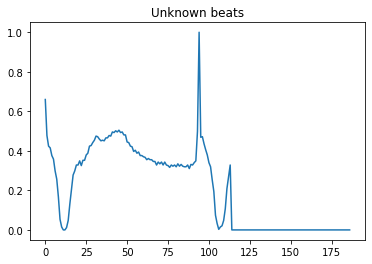

In [24]:
plt.plot(np.array(train_lbl4.sample(1))[0, :187])
plt.title(label_names[4])

In [25]:
# train.sample(1).values[0]

In [26]:
train.sample(1)[187]

84460    4.0
Name: 187, dtype: float32

In [27]:
import gc

In [28]:
gc.collect()

265

In [29]:
  # f = open('/content/drive/MyDrive/mitbih/labels/labels.txt','a')
  # f.write(str(train.iloc[i,187]))
  # f.write('\n')

In [ ]:
!cp drive/MyDrive/mitbih.zip .
!unzip mitbih.zip

Archive:  mitbih.zip
replace mitbih/fb/79811.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cp drive/MyDrive/mitbih_test.zip .
!unzip mitbih_test.zip

Archive:  mitbih_test.zip
replace mitbih/test/fb/17827.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
import zipfile
zf = "/content/drive/MyDrive/mitbih.zip"
target_dir = "/content/train"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [31]:
import zipfile
zf = "/content/drive/MyDrive/mitbih_test.zip"
target_dir = "/content/test"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
# DONT RUN BELOW CELLS TO GENERATE IF DATASET COPIED FROM DRIVE IN ABOVE CELLS
from tqdm.notebook import tqdm

import concurrent.futures
import os

In [ ]:
datadir = "/content/mitbih/test/"

In [ ]:
!mkdir -p $datadir/normal
!mkdir $datadir/sve
!mkdir $datadir/ve
!mkdir $datadir/fb
!mkdir $datadir/ub

In [ ]:
# replaced the slower if statements
lbl_dict = {0.0: 'normal/',
            1.0: 'sve/',
            2.0: 've/',
            3.0: 'fb/',
            4.0: 'ub/'}

In [ ]:
# function to call in parallel
def save_sample(sample, save_path):
    plt.figure(figsize=[1,1])
    plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.plot(sample)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

In [ ]:
test.shape[0]

25000

In [ ]:
# Multiprocessing call
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    for i in tqdm(range(test.shape[0])):
        sample = test.iloc[i,:187]
        save_path = datadir+lbl_dict[test.iloc[i,187]]+str(i)+'.jpg'
        if not os.path.exists(save_path):
            executor.submit(save_sample, sample, save_path)

In [ ]:
!zip -q -r mitbih_test.zip mitbih/test/

In [ ]:
!mv mitbih_test.zip drive/MyDrive/

In [ ]:
# DONT RUN BELOW CELLS TO GENERATE IF DATASET COPIED FROM DRIVE IN ABOVE CELLS
from tqdm.notebook import tqdm

In [ ]:
datadir = "/content/mitbih/"

In [ ]:
# !rm -rf $datadir

In [ ]:
!mkdir -p $datadir/normal
!mkdir $datadir/sve
!mkdir $datadir/ve
!mkdir $datadir/fb
!mkdir $datadir/ub

In [ ]:
import concurrent.futures
import os

In [ ]:
# replaced the slower if statements
lbl_dict = {0.0: 'normal/',
            1.0: 'sve/',
            2.0: 've/',
            3.0: 'fb/',
            4.0: 'ub/'}
# function to call in parallel
def save_sample(sample, save_path):
    plt.figure(figsize=[1,1])
    plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.plot(sample)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

In [ ]:
# Multiprocessing call
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    for i in tqdm(range(train.shape[0])):
        sample = train.iloc[i,:187]
        save_path = datadir+lbl_dict[train.iloc[i,187]]+str(i)+'.jpg'
        if not os.path.exists(save_path):
            executor.submit(save_sample, sample, save_path)

In [ ]:
!zip -q -r mitbih.zip mitbih/

In [ ]:
!mv mitbih.zip drive/MyDrive/

In [ ]:
gc.collect()

50

In [ ]:
!ls '/content/mitbih/'

fb  normal  sve  ub  ve


In [32]:
batch_size = 512

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/content/train/mitbih',target_size=(64,64),batch_size=batch_size,
                                                    class_mode='categorical',color_mode='grayscale')

Found 100000 images belonging to 5 classes.


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = train_datagen.flow_from_directory('/content/test/mitbih/test',target_size=(64,64),batch_size=batch_size,
                                                    class_mode='categorical',color_mode='grayscale',shuffle=False)

Found 25000 images belonging to 5 classes.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, MaxPooling2D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, Add, ReLU, Conv2D, BatchNormalization, Flatten, SeparableConv2D
from sklearn.metrics import f1_score, accuracy_score
import keras
from keras.models import Sequential

In [36]:
model = Sequential()

model.add(SeparableConv2D(32,(3,3),input_shape=(64,64,1),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(SeparableConv2D(32,(3,3),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(SeparableConv2D(64,(3,3),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(SeparableConv2D(64,(3,3),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(SeparableConv2D(128,(3,3),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(SeparableConv2D(128,(3,3),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(keras.layers.ELU())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(activation='softmax',units=5))

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 62, 62, 32)        73        
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
elu (ELU)                    (None, 62, 62, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 60, 60, 32)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
elu_1 (ELU)                  (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=25)

Epoch 1/25
195/195 [==============================] - 96s 402ms/step - loss: 0.6477 - accuracy: 0.7938
Epoch 2/25
195/195 [==============================] - 78s 398ms/step - loss: 0.1467 - accuracy: 0.9519
Epoch 3/25
195/195 [==============================] - 79s 404ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 4/25
195/195 [==============================] - 77s 396ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 5/25
195/195 [==============================] - 77s 395ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 6/25
195/195 [==============================] - 77s 396ms/step - loss: 0.0364 - accuracy: 0.9892
Epoch 7/25
195/195 [==============================] - 79s 403ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 8/25
195/195 [==============================] - 79s 403ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 9/25
195/195 [==============================] - 79s 402ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 10/25
195/195 [==============================] - 79s 402ms/step - l

In [40]:
test_accu = model.evaluate(test_generator)
print('The testing accuracy is - ',test_accu[1]*100,'%')

49/49 [==============================] - 10s 194ms/step - loss: 0.5711 - accuracy: 0.9068
The testing accuracy is -  90.68400263786316 %


In [41]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score, log_loss, precision_score, recall_score

y_bar = np.round(model.predict(test_generator))
y_act = keras.utils.to_categorical(test_generator.labels)

##accuracy
print("Accuracy: ",accuracy_score(y_bar,y_act))
##F1-Score Score
print("F1 score: ",f1_score(y_bar,y_act,average='macro'))
##Precision score
print("Precision: ",precision_score(y_bar,y_act,average='macro'))
##Recall score
print("Recall: ",recall_score(y_bar,y_act,average='macro'))

Accuracy:  0.90648
F1 score:  0.9074460256989918
Precision:  0.90648
Recall:  0.9126633765155494
